<a href="https://colab.research.google.com/github/Fatimat01/cv_human_detection/blob/main/notebooks/FinProjEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kagglehub
import kagglehub


In [ ]:
# Download latest version of the dataset
path = kagglehub.dataset_download("adilshamim8/people-detection")

print("Path to dataset files:", path)


100%|██████████| 1.94G/1.94G [00:23<00:00, 90.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/adilshamim8/people-detection/versions/1


In [ ]:
import os

for split in ["train", "valid", "test"]:
    split_path = os.path.join(path, split, split)  # go one level deeper
    print(f"\nContents of {split}/{split}:")
    print(os.listdir(split_path))



Contents of train/train:
['0001637_jpg.rf.a4eaa3773c23308925eb380cdc17d397.jpg', '2008_005174_jpg.rf.d84594968859ee81c614a832af572ffb.jpg', '2007_007481_jpg.rf.c6bb7e76009269051f5349f00a379f0b.jpg', '2008_003062_jpg.rf.17b7229b300163197e198e15c3743a0a.jpg', '2010_003035_jpg.rf.02ef7d3bc9b6e9f40a3abd68851233d9.jpg', 'point05_118_png_jpg.rf.5155aa1770aea0f94a88e11828ea0afb.jpg', '2008_002809_jpg.rf.fd2e5dc3c9e4c4957a013df9704e608a.jpg', '2008_007613_jpg.rf.3927f8c45bfd8beec1a1fd2df7abe794.jpg', '2008_003560_jpg.rf.1b947b3e23c609b80daff7c8ad5a8788.jpg', '2008_000880_jpg.rf.7b0ed9c96c1779e9009097cc5153e0c0.jpg', 'crop_4690_jpg.rf.96a301bbb37f72f61767597819de6374.jpg', '2008_001429_jpg.rf.09bbe368e990f31555153658a289c3fe.jpg', '2009_001676_jpg.rf.3c58d4e3c82f29ab5e479f040bdfacc1.jpg', '273271-845d0002c8b4daa_jpg.rf.84bb3dbec2a463a01f44fde3f0b68276.jpg', '2010_002044_jpg.rf.310f547bba7a09802388988e83b26e58.jpg', '2007_006046_jpg.rf.1476a0619870d349d8db9791bd49e933.jpg', 'HILZJIWVPORL_jpg.rf

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.3 MB/s eta 0:00:00


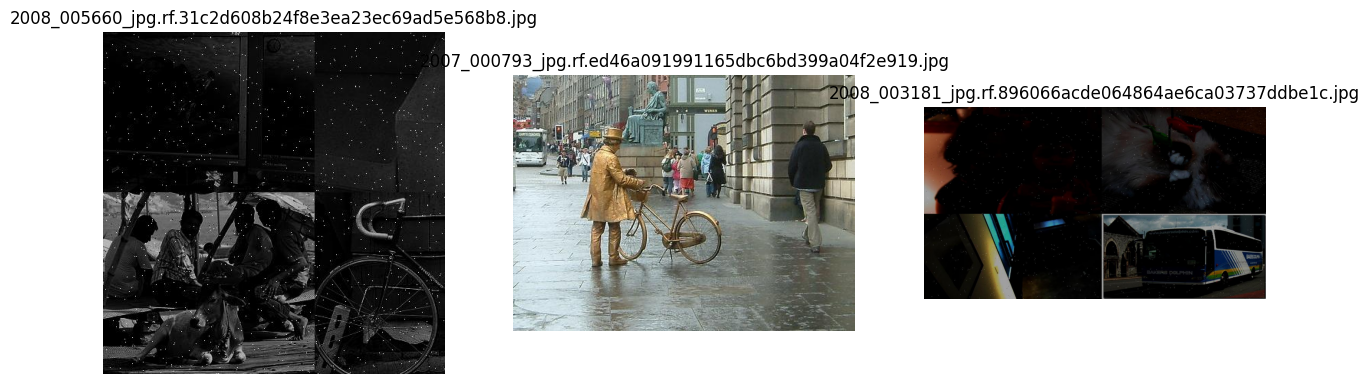

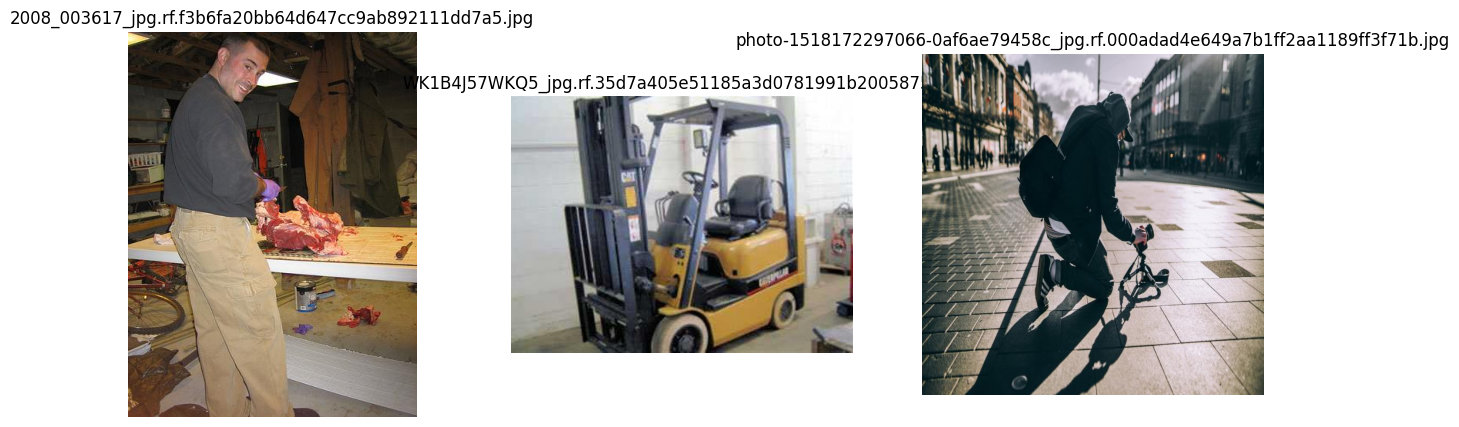

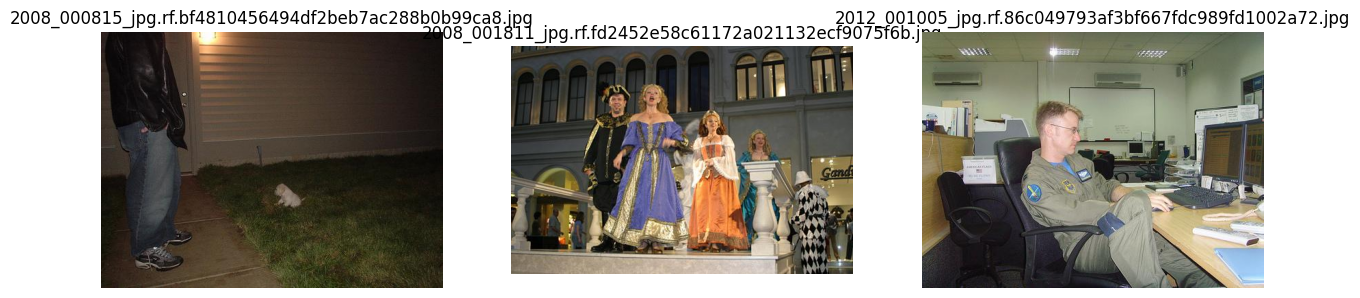

In [ ]:

import os, random, cv2
import matplotlib.pyplot as plt
import numpy as np
from ultralytics import YOLO


#examples of some sample images
def show_samples(split = "train/train", n=3):
    img_dir = os.path.join(path, split)
    files = random.sample(os.listdir(img_dir), n)
    fig, axs = plt.subplots(1, n, figsize = (15,5))
    for i, f in enumerate(files):
        img = cv2.imread(os.path.join(img_dir, f))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axs[i].imshow(img)
        axs[i].set_title(f)
        axs[i].axis("off")
    plt.show()

show_samples("train/train")
show_samples("valid/valid")
show_samples("test/test")


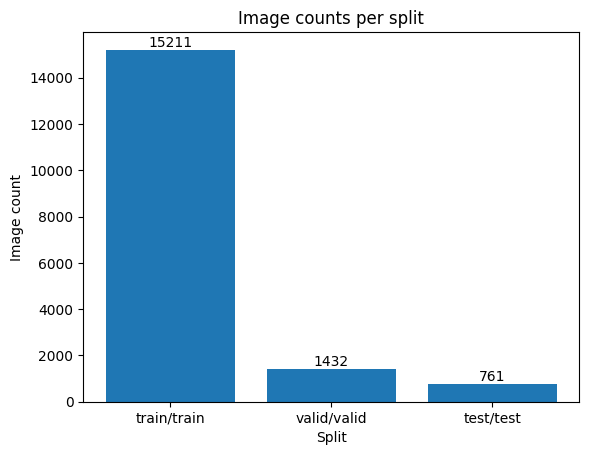

In [ ]:
#splits stats
splits = ["train/train", "valid/valid", "test/test"]
counts = [len(os.listdir(os.path.join(path, s))) for s in splits]

plt.bar(splits, counts)
plt.title("Image counts per split")
plt.xlabel("Split")
plt.ylabel("Image count")

#counts
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha = 'center', va = 'bottom')

plt.show()

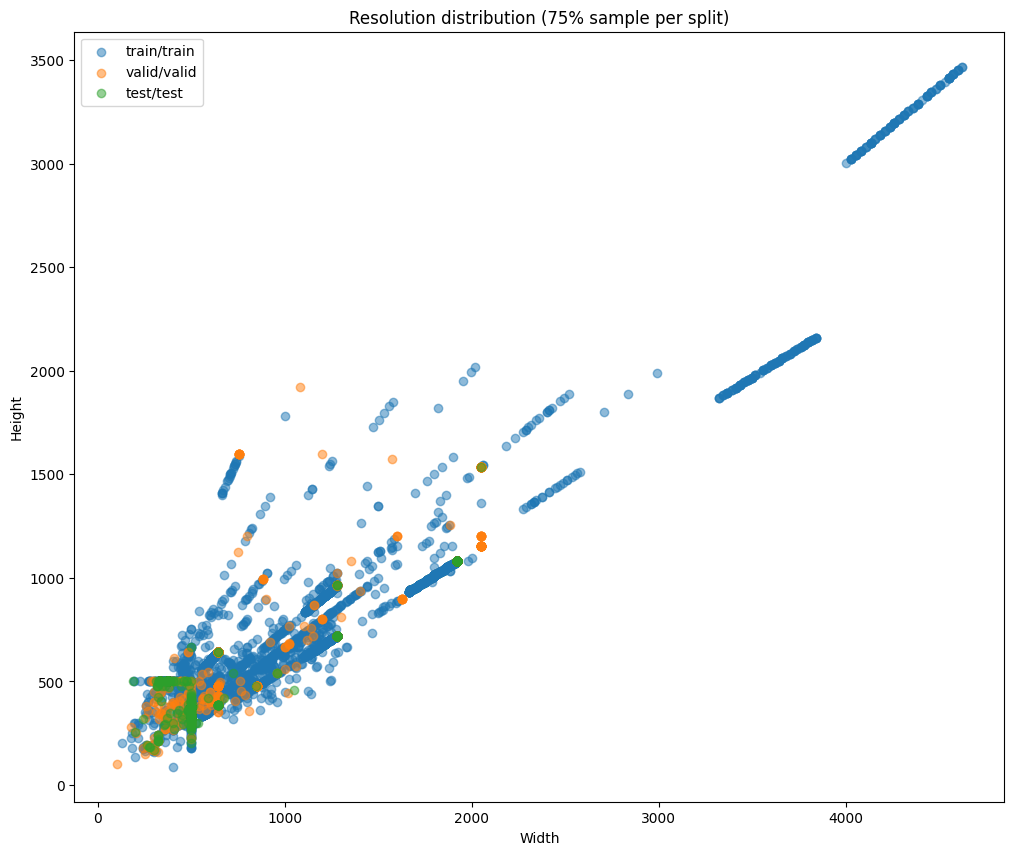

In [ ]:
import random

#Resolution distribution for the entire dataset with sampling and colored by split
splits = ["train/train", "valid/valid", "test/test"]

plt.figure(figsize=(12, 10))

for split_name in splits:
    resolutions = []
    img_dir = os.path.join(path, split_name)
    all_files = os.listdir(img_dir)

    # Sample 75% of the files for the current split
    sample_size = int(len(all_files) * 0.75)
    sampled_files = random.sample(all_files, sample_size)

    for img_file in sampled_files:
        img_path = os.path.join(img_dir, img_file)
        img = cv2.imread(img_path)
        if img is None:  # Skip corrupted or unreadable files
            continue
        h, w = img.shape[:2]
        resolutions.append((w, h))

    if resolutions: # Only plot if there are any resolutions to plot
        widths, heights = zip(*resolutions)
        plt.scatter(widths, heights, alpha=0.5, label=split_name)

plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Resolution distribution (75% sample per split)")
plt.legend()
plt.show()

In [ ]:

#pretrained YOLOv8 nano
model = YOLO("yolov8n.pt")

def analyze_split(split_name):
    """Sample 20% of images from a split and count detected people per image."""
    img_dir = os.path.join(path, split_name)
    files = os.listdir(img_dir)
    sample_size = max(1, int(0.2 * len(files)))  # 20% sample
    sample_files = random.sample(files, sample_size)

    detections_per_image = []
    for f in sample_files:
        results = model(os.path.join(img_dir, f))
        #count only 'persn' class (class id 0 in COCO)
        count = sum(1 for r in results[0].boxes.cls if int(r) == 0)
        detections_per_image.append(count)

    #histogram
    plt.hist(detections_per_image, bins=range(0, max(detections_per_image)+2))
    plt.xlabel("Number of people detected per image")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of auto-detected people in {split_name}")
    plt.show()

    return detections_per_image

Streaming output truncated to the last 5000 lines.
image 1/1 /root/.cache/kagglehub/datasets/adilshamim8/people-detection/versions/1/train/train/2010_005276_jpg.rf.9271e9abc77e5251cfcdb40104e78b98.jpg: 384x640 13 persons, 1 backpack, 1 chair, 138.1ms
Speed: 3.6ms preprocess, 138.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /root/.cache/kagglehub/datasets/adilshamim8/people-detection/versions/1/train/train/2007_006282_jpg.rf.88a70e235baecb7476af349879469b61.jpg: 384x640 12 persons, 1 car, 1 motorcycle, 2 buss, 1 sheep, 141.6ms
Speed: 3.9ms preprocess, 141.6ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /root/.cache/kagglehub/datasets/adilshamim8/people-detection/versions/1/train/train/ala_2_069_png_jpg.rf.824aaaea0a2f5ac40638e18776462622.jpg: 384x640 5 persons, 5 cars, 1 boat, 1 cat, 155.8ms
Speed: 4.5ms preprocess, 155.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /root/.cache/kagglehub

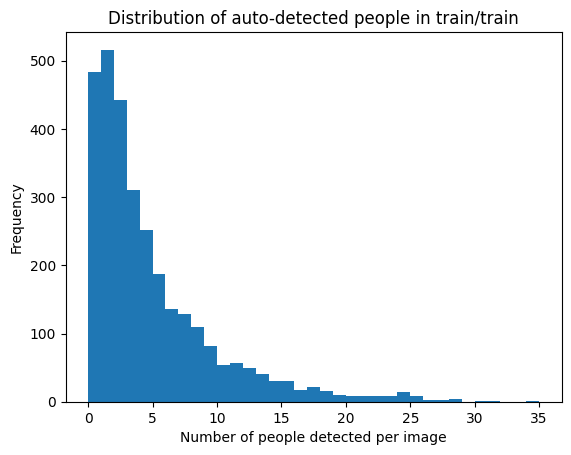

In [ ]:
#analyses train
train_counts = analyze_split("train/train")


image 1/1 /root/.cache/kagglehub/datasets/adilshamim8/people-detection/versions/1/valid/valid/2012_003996_jpg.rf.5ea7f316ed62da01b8ed67b681eae69a.jpg: 640x480 2 persons, 171.3ms
Speed: 4.1ms preprocess, 171.3ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /root/.cache/kagglehub/datasets/adilshamim8/people-detection/versions/1/valid/valid/images-8-_jpg.rf.2dcc00568817e0fc3dc408a28f6eb812.jpg: 480x640 7 persons, 1 car, 2 buss, 176.5ms
Speed: 5.7ms preprocess, 176.5ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /root/.cache/kagglehub/datasets/adilshamim8/people-detection/versions/1/valid/valid/2010_005299_jpg.rf.9360d31e26801dc5ce03a99fabf39802.jpg: 448x640 2 persons, 2 bottles, 154.2ms
Speed: 2.6ms preprocess, 154.2ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /root/.cache/kagglehub/datasets/adilshamim8/people-detection/versions/1/valid/valid/2008_002046_jpg.rf.1ce8c90532059fa1cbc5d5944978bfb

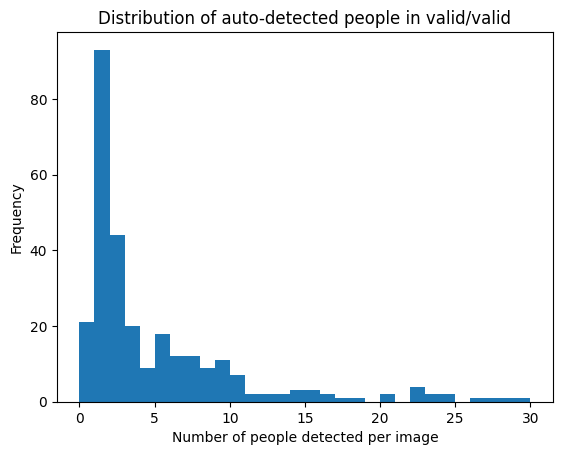

In [ ]:
#analyzes valid
valid_counts = analyze_split("valid/valid")


image 1/1 /root/.cache/kagglehub/datasets/adilshamim8/people-detection/versions/1/test/test/2008_002715_jpg.rf.ce7b89c03cfd7374e55c5fbb828327bf.jpg: 640x480 1 person, 228.4ms
Speed: 41.6ms preprocess, 228.4ms inference, 5.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /root/.cache/kagglehub/datasets/adilshamim8/people-detection/versions/1/test/test/2008_001866_jpg.rf.8d210eebe1f1dd562adc5ebf12843cae.jpg: 448x640 2 persons, 1 train, 414.2ms
Speed: 3.9ms preprocess, 414.2ms inference, 2.5ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /root/.cache/kagglehub/datasets/adilshamim8/people-detection/versions/1/test/test/2007_002545_jpg.rf.3f547724deccac0c2c70f86e0f36dbb0.jpg: 640x480 1 person, 1 bottle, 1 couch, 1 bed, 504.0ms
Speed: 9.3ms preprocess, 504.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /root/.cache/kagglehub/datasets/adilshamim8/people-detection/versions/1/test/test/2008_001957_jpg.rf.06ad67bc14106b7aabc178bfbf6a7

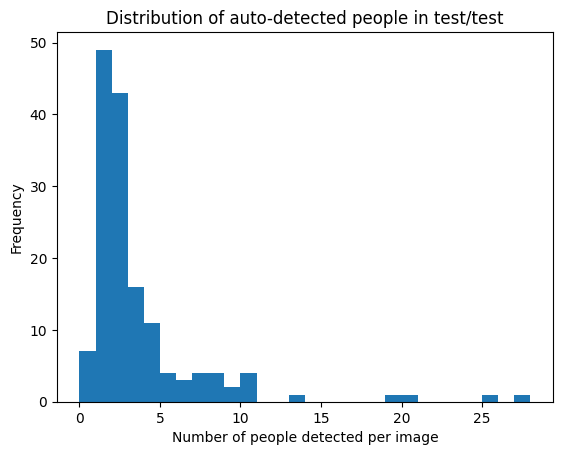

In [ ]:
#analyzes test
def analyze_split2(split_name):
    """Sample 20% of images from a split and count detected people per image."""
    img_dir = os.path.join(path, split_name)
    files = [f for f in os.listdir(img_dir) if f.lower().endswith((".jpg", ".jpeg", ".png"))]
    sample_size = max(1, int(0.2 * len(files)))  # 20% sample
    sample_files = random.sample(files, sample_size)

    detections_per_image = []
    for f in sample_files:
        img_path = os.path.join(img_dir, f)
        results = model(img_path)
        # count only 'person' class (class id 0 in COCO)
        count = sum(1 for r in results[0].boxes.cls if int(r) == 0)
        detections_per_image.append(count)

    # histogram
    plt.hist(detections_per_image, bins=range(0, max(detections_per_image)+2))
    plt.xlabel("Number of people detected per image")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of auto-detected people in {split_name}")
    plt.show()

    return detections_per_image

test_counts = analyze_split2("test/test")

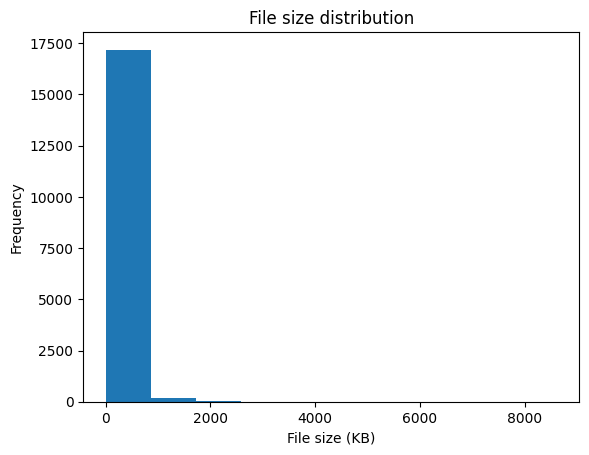

In [ ]:
#File size distribution
sizes = []
for split in ["train/train", "valid/valid", "test/test"]:
    img_dir = os.path.join(path, split)
    for f in os.listdir(img_dir):
        sizes.append(os.path.getsize(os.path.join(img_dir, f)) / 1024)

plt.hist(sizes, bins = 10)
plt.xlabel("File size (KB)")
plt.ylabel("Frequency")
plt.title("File size distribution")
plt.show()


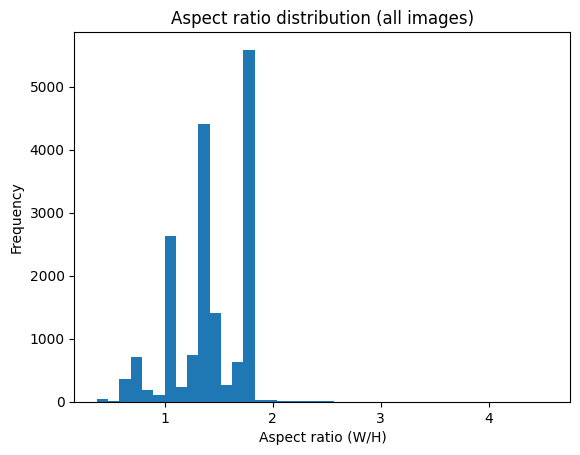

In [ ]:
#Aspect ratio distribution
ratios = []
for split in ["train/train", "valid/valid", "test/test"]:
    img_dir = os.path.join(path, split)
    for f in os.listdir(img_dir):
        img = cv2.imread(os.path.join(img_dir, f))
        if img is None:  # skip corrupted files
            continue
        h, w = img.shape[:2]
        ratios.append(w / h)

plt.hist(ratios, bins=40)
plt.xlabel("Aspect ratio (W/H)")
plt.ylabel("Frequency")
plt.title("Aspect ratio distribution (all images)")
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%shell jupyter nbconvert --to pdf '/content/gdrive/MyDrive/Colab Notebooks/FinProjEDA.ipynb'

[NbConvertApp] Converting notebook /content/gdrive/MyDrive/Colab Notebooks/FinProjEDA.ipynb to pdf
[NbConvertApp] Support files will be in FinProjEDA_files/
[NbConvertApp] Making directory ./FinProjEDA_files
[NbConvertApp] Writing 1753722 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 2780827 bytes to /content/gdrive/MyDrive/Colab Notebooks/FinProjEDA.pdf
